In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import itertools
from statsmodels.tsa.stattools import pacf, acf
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from IPython.display import Image
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import classification_report, mean_squared_error,r2_score
from sklearn.tree import DecisionTreeRegressor

In [2]:
all_sensors = pd.read_csv('/Users/Jewel/Desktop/capstone - melbourne data/all_sensors_prev_years.csv')

In [14]:
all_sensors

,Barbeque,Bicycle Rails,Bin Corral,Bollard,Commercial Accommodation,Community Use,Community Use.1,Drinking Fountain,Education Centre,Educational/Research,...,avg_n_floors,daily_avg_counts,day,month,num_bikes,num_lights,prev_year_counts,sensor_id,weekday,year
0,0,26,0,80,1.0,1,0.0,3,0,1.0,...,6.266667,706.083333,1,1,0,44,816.875000,2,6,2012
1,0,26,0,80,1.0,1,0.0,3,0,1.0,...,6.266667,762.000000,2,1,0,44,1096.375000,2,0,2012
2,0,26,0,80,1.0,1,0.0,3,0,1.0,...,6.266667,1137.708333,3,1,0,44,1022.583333,2,1,2012
3,0,26,0,80,1.0,1,0.0,3,0,1.0,...,6.266667,1299.333333,4,1,0,44,1252.500000,2,2,2012
4,0,26,0,80,1.0,1,0.0,3,0,1.0,...,6.266667,1357.333333,5,1,0,44,1307.375000,2,3,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62286,0,19,0,22,3.0,0,0.0,1,0,3.0,...,10.784524,639.041667,27,12,0,0,703.416667,53,3,2018
62287,0,19,0,22,3.0,0,0.0,1,0,3.0,...,10.784524,704.500000,28,12,0,0,722.958333,53,4,2018
62288,0,19,0,22,3.0,0,0.0,1,0,3.0,...,10.784524,608.375000,29,12,0,0,754.666667,53,5,2018
62289,0,19,0,22,3.0,0,0.0,1,0,3.0,...,10.784524,527.500000,30,12,0,0,634.541667,53,6,2018


## Use only location factors to predict Daily Average Count

In [141]:
locations = all_sensors.drop(['prev_year_counts', 'weekday', 'year', 'day', 'month'], axis = 1)

In [142]:
locations

,Barbeque,Bicycle Rails,Bin Corral,Bollard,Commercial Accommodation,Community Use,Community Use.1,Drinking Fountain,Education Centre,Educational/Research,...,Unoccupied - Unused,Vacant Land,Warehouse/Store,Wholesale,Workshop/Studio,avg_n_floors,daily_avg_counts,num_bikes,num_lights,sensor_id
0,0,26,0,80,1.0,1,0.0,3,0,1.0,...,4.0,0,0,0.0,0.0,6.266667,706.083333,0,44,2
1,0,26,0,80,1.0,1,0.0,3,0,1.0,...,4.0,0,0,0.0,0.0,6.266667,762.000000,0,44,2
2,0,26,0,80,1.0,1,0.0,3,0,1.0,...,4.0,0,0,0.0,0.0,6.266667,1137.708333,0,44,2
3,0,26,0,80,1.0,1,0.0,3,0,1.0,...,4.0,0,0,0.0,0.0,6.266667,1299.333333,0,44,2
4,0,26,0,80,1.0,1,0.0,3,0,1.0,...,4.0,0,0,0.0,0.0,6.266667,1357.333333,0,44,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62286,0,19,0,22,3.0,0,0.0,1,0,3.0,...,1.0,0,0,0.0,0.0,10.784524,639.041667,0,0,53
62287,0,19,0,22,3.0,0,0.0,1,0,3.0,...,1.0,0,0,0.0,0.0,10.784524,704.500000,0,0,53
62288,0,19,0,22,3.0,0,0.0,1,0,3.0,...,1.0,0,0,0.0,0.0,10.784524,608.375000,0,0,53
62289,0,19,0,22,3.0,0,0.0,1,0,3.0,...,1.0,0,0,0.0,0.0,10.784524,527.500000,0,0,53


In [143]:
locations.groupby('sensor_id').mean()

,Barbeque,Bicycle Rails,Bin Corral,Bollard,Commercial Accommodation,Community Use,Community Use.1,Drinking Fountain,Education Centre,Educational/Research,...,Unoccupied - Under Renovation,Unoccupied - Unused,Vacant Land,Warehouse/Store,Wholesale,Workshop/Studio,avg_n_floors,daily_avg_counts,num_bikes,num_lights
sensor_id,,,,,,,,,,,,,,,,,,,,,
1,0,31,0,77,2.00,1,0.0,4,0,0.250000,...,1.000000,3.500000,0,0,0.00,0.00,4.970087,1302.050350,0,56
2,0,26,0,80,1.00,1,0.0,3,0,0.285714,...,0.285714,4.000000,0,0,0.00,0.00,6.437632,1076.198754,0,44
3,0,41,0,10,0.00,0,0.0,3,0,0.000000,...,0.922084,1.314249,0,0,0.00,0.00,4.170224,1277.101079,1,31
4,0,40,0,53,1.00,1,0.0,1,0,1.200000,...,0.600000,1.200000,0,0,0.00,0.80,6.265910,1528.765743,0,0
5,0,15,0,115,0.00,0,0.0,0,0,0.000000,...,0.000000,0.000000,0,0,0.00,0.00,0.000000,1114.565964,0,47
6,0,10,0,8,0.00,0,0.0,0,0,0.000000,...,0.142857,0.000000,0,0,0.00,0.00,3.500000,1223.140587,0,205
7,0,0,0,2,0.00,0,0.0,2,0,0.000000,...,0.000000,0.000000,0,0,0.00,0.00,0.000000,423.833753,0,29
8,1,10,0,28,0.00,0,0.0,0,0,0.000000,...,0.000000,0.000000,0,0,0.00,0.00,0.000000,162.857588,0,938
9,0,42,0,8,0.00,0,0.0,0,0,0.000000,...,0.000000,0.142857,0,0,0.00,0.00,12.428571,552.525071,0,50


In [144]:
X = locations.copy()
y = X.pop('daily_avg_counts')

In [146]:
y.mean() 
#baseline would predict 593.55 for all sensors

593.5480576507682

In [11]:
len(X.sensor_id.value_counts())

40

In [9]:
X.columns

Index(['Barbeque', 'Bicycle Rails', 'Bin Corral', 'Bollard',
       'Commercial Accommodation', 'Community Use', 'Community Use.1',
       'Drinking Fountain', 'Education Centre', 'Educational/Research',
       'Entertainment/Recreation - Indoor', 'Equipment Installation',
       'Floral Crate/Planter Box', 'Health Services', 'Hoop', 'Horse Trough',
       'Hospital/Clinic', 'House/Townhouse', 'Industrial',
       'Information Pillar', 'Institutional Accommodation',
       'Leisure/Recreation', 'Litter Bin', 'Manufacturing', 'Mixed Use',
       'Office', 'Office.1', 'Parking - Commercial Covered',
       'Parking - Private Covered', 'Performances, Conferences, Ceremonies',
       'Picnic Setting', 'Place Of Assembly', 'Place of Worship',
       'Public Display Area', 'Purpose Built', 'Residential Accommodation',
       'Residential Apartment', 'Retail', 'Retail - Cars', 'Retail - Shop',
       'Retail - Showroom', 'Retail - Stall', 'Seat',
       'Specialist Residential Accommodation',

In [7]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)

In [8]:
#standardize
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# Linear Regression

In [113]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [114]:
print('Training score: ', model.score(X_train, y_train))
print('Test score: ', model.score(X_test, y_test))
print('CV score: ', (cross_val_score(model, X_train, y_train)).mean())

Training score:  0.7751371931735674
Test score:  0.7749505673455981
CV score:  0.7746594349480479


In [136]:
predictions = model.predict(X_test)
residuals = pd.DataFrame(predictions, y_test)
residuals.reset_index(inplace = True)
residuals.rename({'daily_avg_counts': 'y_test', 0: 'predictions'}, axis = 1, inplace = True)
residuals['residuals'] = residuals.y_test - residuals.predictions
residuals

,y_test,predictions,residuals
0,1207.333333,836.551476,370.781857
1,529.916667,620.047397,-90.130731
2,321.458333,223.839887,97.618446
3,706.875000,547.170970,159.704030
4,86.375000,-205.662887,292.037887
...,...,...,...
12454,203.291667,92.995621,110.296046
12455,1418.708333,1258.641942,160.066391
12456,360.583333,296.242995,64.340338
12457,371.291667,334.758744,36.532923


In [116]:
(mean_squared_error(y_test, predictions))**0.5

224.5919569235911

In [134]:
# collect the model coefficients in a dataframe
df_coef = pd.DataFrame(model.coef_, index=X_train.columns,
                       columns=['coefficients'])

feature_importance = df_coef.sort_values(by = 'coefficients', ascending = False)
feature_importance.reset_index(inplace = True)
feature_importance

,index,coefficients
0,Seat,1085.751340
1,Floral Crate/Planter Box,481.192918
2,Hospital/Clinic,373.223630
3,Tree Guard,230.476441
4,Community Use.1,173.272096
...,...,...
56,Drinking Fountain,-363.800566
57,Mixed Use,-394.612562
58,Barbeque,-433.913258
59,Place of Worship,-434.429050


Text(0, 0.5, 'Feature')

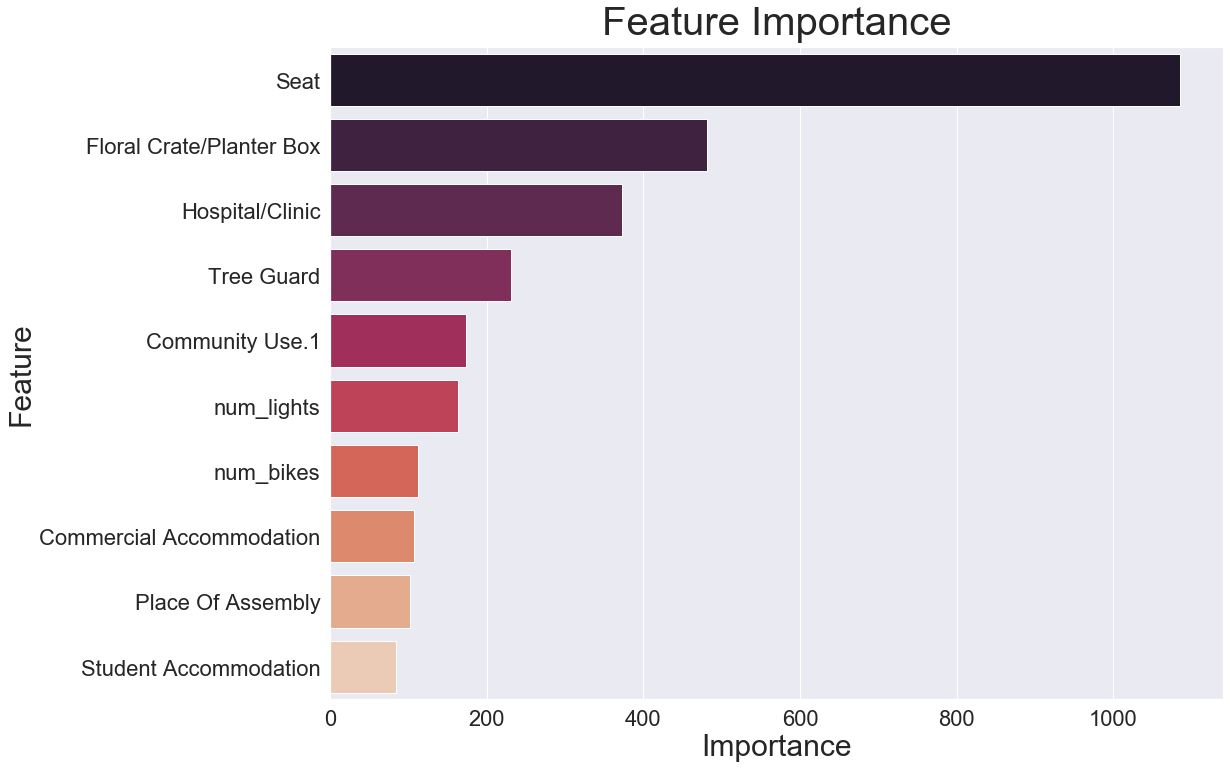

In [135]:
#sns.set_style('ticks')
sns.set(font_scale = 2)
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(16, 12)
sns.barplot(x = 'coefficients', y = 'index', data=feature_importance[:10], orient='h', palette = 'rocket', saturation=0.7)  
ax.set_title("Feature Importance", fontsize=40, y=1.01)
ax.set_xlabel('Importance', fontsize = 30)
ax.set_ylabel('Feature', fontsize = 30)

#fig.savefig('linreg_coef.png')

In [138]:
predictions = residuals[['y_test', 'predictions']]
predictions

,y_test,predictions
0,1207.333333,836.551476
1,529.916667,620.047397
2,321.458333,223.839887
3,706.875000,547.170970
4,86.375000,-205.662887
...,...,...
12454,203.291667,92.995621
12455,1418.708333,1258.641942
12456,360.583333,296.242995
12457,371.291667,334.758744


Text(0, 0.5, 'Actual')

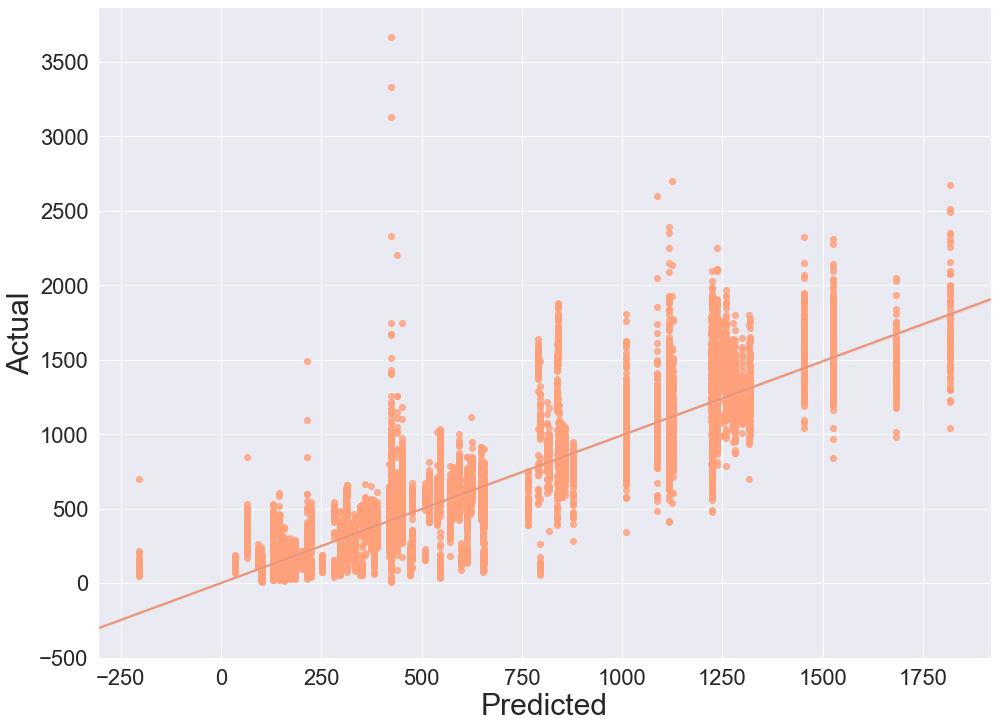

In [139]:
sns.axes_style(style='white')

sns.set(font_scale = 2)
fig, ax = plt.subplots()
fig.set_size_inches(16, 12)
ax = sns.regplot(x="predictions", y="y_test", data= predictions,  scatter_kws = {'color': 'lightsalmon'}, 
                 line_kws = {'color': 'darksalmon'})
ax.set_xlabel('Predicted', fontsize = 30)
ax.set_ylabel('Actual', fontsize = 30)

# Ridge & Lasso Regularization

### Ridge with GridSearchCV

In [58]:
parameters = {'alpha': np.logspace(-20, 20, 50), 'fit_intercept': [True, False], 
              'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}

# define the model/ estimator
model = Ridge(max_iter = 100000)

# define the grid search
ridge= GridSearchCV(model, parameters,cv=5)

#fit the grid search
ridge.fit(X_train,y_train)

# best estimator
print(ridge.best_estimator_)

# best model
best_model = ridge.best_estimator_
best_model.fit(X_train,y_train)

Ridge(alpha=0, copy_X=True, fit_intercept=True, max_iter=100000,
      normalize=False, random_state=None, solver='sag', tol=0.001)


Ridge(alpha=0, copy_X=True, fit_intercept=True, max_iter=100000,
      normalize=False, random_state=None, solver='sag', tol=0.001)

In [71]:
print('Training score: ', best_model.score(X_train, y_train))
print('Test score: ', best_model.score(X_test, y_test))
print('CV score: ', (cross_val_score(best_model, X_train, y_train)).mean())

Training score:  0.7751369760473157
Test score:  0.7749396517892876
CV score:  0.7746591879675973


In [72]:
predictions = best_model.predict(X_test)
residuals = pd.DataFrame(predictions, y_test)
residuals.reset_index(inplace = True)
residuals.rename({'daily_avg_counts': 'y_test', 0: 'predictions'}, axis = 1, inplace = True)
residuals['residuals'] = residuals.y_test - residuals.predictions
residuals

,y_test,predictions,residuals
0,1207.333333,835.858927,371.474406
1,529.916667,620.259364,-90.342698
2,321.458333,223.533867,97.924466
3,706.875000,547.391173,159.483827
4,86.375000,-204.824740,291.199740
...,...,...,...
12454,203.291667,93.188564,110.103103
12455,1418.708333,1258.735920,159.972413
12456,360.583333,296.424841,64.158493
12457,371.291667,334.829338,36.462329


In [73]:
(mean_squared_error(y_test, predictions))**0.5

224.5974035412469

In [74]:
# collect the model coefficients in a dataframe
df_coef = pd.DataFrame(best_model.coef_, index=X_train.columns,
                       columns=['coefficients'])

# calculate the absolute values of the coefficients to gauge influence (show importance of predictor variables)
df_coef['coef_abs'] = df_coef.coefficients.abs()

df_coef.sort_values(by = 'coefficients')

,coefficients,coef_abs
Retail,-725.950468,725.950468
Barbeque,-432.751487,432.751487
Place of Worship,-432.624269,432.624269
Mixed Use,-392.993171,392.993171
Drinking Fountain,-362.318159,362.318159
...,...,...
Community Use.1,173.352397,173.352397
Tree Guard,230.246726,230.246726
Hospital/Clinic,372.830306,372.830306
Floral Crate/Planter Box,478.570578,478.570578


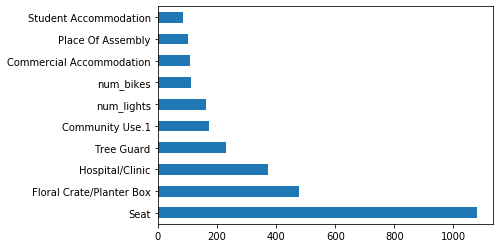

In [75]:
# 10 features that impact daily counts the most
df_coef['coefficients'].sort_values(ascending = False)[:10].plot(kind='barh');

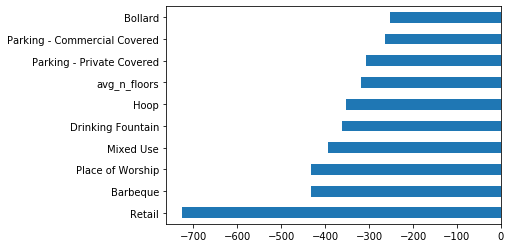

In [76]:
# 10 features that impact daily counts the least
df_coef['coefficients'].sort_values(ascending = True)[:10].plot(kind='barh');

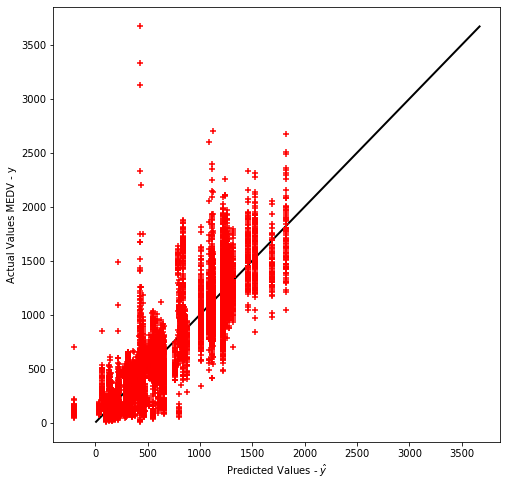

In [77]:
#predicted y values
predictions = best_model.predict(X_test)

#residuals (or error between predictions and actual)
residuals = y_test - predictions

# Plot predicted vs actual 
plt.figure(figsize=(8,8))
plt.scatter(predictions, y_test, s=30, c='r', marker='+', zorder=10)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], c='k', lw=2)
plt.xlabel("Predicted Values - $\hat{y}$")
plt.ylabel("Actual Values MEDV - y")
plt.show()

### Lasso with GridSearchCV

In [78]:
parameters = {'alpha': np.logspace(-4, 4, 10), 'fit_intercept': [True, False]}

# define the model/ estimator
model = Lasso(max_iter = 100000)

# define the grid search
lasso= GridSearchCV(model, parameters,cv=5)

#fit the grid search
lasso.fit(X_train,y_train)

# best estimator
print(lasso.best_estimator_)

# best model
lasso_model = lasso.best_estimator_
lasso_model.fit(X_train,y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=100000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)


Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=100000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [79]:
print('Training score: ', lasso_model.score(X_train, y_train))
print('Test score: ', lasso_model.score(X_test, y_test))
print('CV score: ', (cross_val_score(lasso_model, X_train, y_train)).mean())

Training score:  0.7751371919196792
Test score:  0.7749497195018777
CV score:  0.7746594488139156


In [80]:
predictions = lasso_model.predict(X_test)
residuals = pd.DataFrame(predictions, y_test)
residuals.reset_index(inplace = True)
residuals.rename({'daily_avg_counts': 'y_test', 0: 'predictions'}, axis = 1, inplace = True)
residuals['residuals'] = residuals.y_test - residuals.predictions
residuals

,y_test,predictions,residuals
0,1207.333333,836.491025,370.842308
1,529.916667,620.065855,-90.149189
2,321.458333,223.827778,97.630555
3,706.875000,547.184720,159.690280
4,86.375000,-205.597623,291.972623
...,...,...,...
12454,203.291667,93.017058,110.274608
12455,1418.708333,1258.645070,160.063264
12456,360.583333,296.257254,64.326080
12457,371.291667,334.765809,36.525857


In [81]:
(mean_squared_error(y_test, predictions))**0.5

224.59237998331355

In [82]:
# collect the model coefficients in a dataframe
df_coef = pd.DataFrame(lasso_model.coef_, index=X_train.columns,
                       columns=['coefficients'])

# calculate the absolute values of the coefficients to gauge influence (show importance of predictor variables)
df_coef['coef_abs'] = df_coef.coefficients.abs()

df_coef.sort_values(by = 'coefficients')

,coefficients,coef_abs
Retail,-729.668979,729.668979
Place of Worship,-434.288118,434.288118
Barbeque,-433.821007,433.821007
Mixed Use,-394.486823,394.486823
Drinking Fountain,-363.685639,363.685639
...,...,...
Community Use.1,173.274561,173.274561
Tree Guard,230.450200,230.450200
Hospital/Clinic,373.173533,373.173533
Floral Crate/Planter Box,480.996486,480.996486


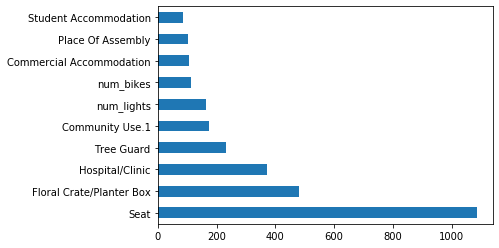

In [83]:
# 10 features that impact daily counts the most
df_coef['coefficients'].sort_values(ascending = False)[:10].plot(kind='barh');

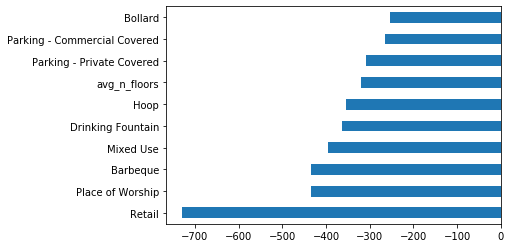

In [84]:
# 10 features that impact daily counts the least
df_coef['coefficients'].sort_values(ascending = True)[:10].plot(kind='barh');

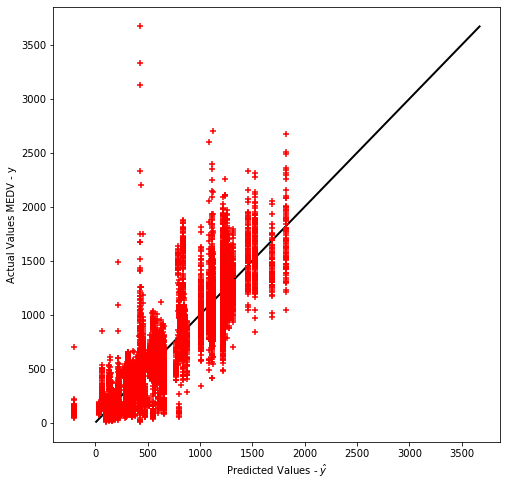

In [85]:
#predicted y values
predictions = lasso_model.predict(X_test)

#residuals (or error between predictions and actual)
residuals = y_test - predictions

# Plot predicted vs actual 
plt.figure(figsize=(8,8))
plt.scatter(predictions, y_test, s=30, c='r', marker='+', zorder=10)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], c='k', lw=2)
plt.xlabel("Predicted Values - $\hat{y}$")
plt.ylabel("Actual Values MEDV - y")
plt.show()

# Decision Tree Regressor


In [16]:
dtr_params = {
    'max_depth': list(range(1, 11))+[None],
    'max_features': [None, 1, 2, 3],
    'min_samples_split': [2, 3, 4, 5, 10, 15, 20, 25, 30, 40, 50],
    'ccp_alpha': [0, 0.001, 0.005, 0.009, 0.01, 0.05]
}


# set the gridsearch
model = DecisionTreeRegressor()
dtr_gs = GridSearchCV(model, dtr_params, cv=5, verbose=1, n_jobs=2)
dtr_gs.fit(X_train, y_train)
print(dtr_gs.best_params_)
best_model = dtr_gs.best_estimator_

Fitting 5 folds for each of 2904 candidates, totalling 14520 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    5.7s
[Parallel(n_jobs=2)]: Done 323 tasks      | elapsed:   16.7s
[Parallel(n_jobs=2)]: Done 823 tasks      | elapsed:   41.0s
[Parallel(n_jobs=2)]: Done 1523 tasks      | elapsed:  1.4min
[Parallel(n_jobs=2)]: Done 2423 tasks      | elapsed:  2.4min
[Parallel(n_jobs=2)]: Done 3523 tasks      | elapsed:  3.3min
[Parallel(n_jobs=2)]: Done 4823 tasks      | elapsed:  4.7min
[Parallel(n_jobs=2)]: Done 6323 tasks      | elapsed:  5.9min
[Parallel(n_jobs=2)]: Done 8023 tasks      | elapsed:  7.3min
[Parallel(n_jobs=2)]: Done 9923 tasks      | elapsed:  9.1min
[Parallel(n_jobs=2)]: Done 12023 tasks      | elapsed: 11.6min
[Parallel(n_jobs=2)]: Done 14323 tasks      | elapsed: 14.0min
[Parallel(n_jobs=2)]: Done 14517 out of 14520 | elapsed: 14.2min remaining:    0.2s
[Parallel(n_jobs=2)]: Done 14520 out of 14520 | elapsed: 14.2min finished


{'ccp_alpha': 0.05, 'max_depth': None, 'max_features': 1, 'min_samples_split': 30}


In [17]:
print('Training score: ', best_model.score(X_train, y_train))
print('Test score: ', best_model.score(X_test, y_test))
print('CV score: ', (cross_val_score(best_model, X_train, y_train)).mean())

Training score:  0.8289405469446385
Test score:  0.8308568882772699
CV score:  0.8284088319966255


In [78]:
predictions = best_model.predict(X_test)
residuals = pd.DataFrame(predictions, y_test)
residuals.reset_index(inplace = True)
residuals.rename({'daily_avg_counts': 'y_test', 0: 'predictions'}, axis = 1, inplace = True)
residuals['residuals'] = residuals.y_test - residuals.predictions
residuals

,y_test,predictions,residuals
0,1207.333333,1059.930468,147.402865
1,529.916667,614.069420,-84.152754
2,321.458333,229.568412,91.889921
3,706.875000,511.853036,195.021964
4,86.375000,112.979847,-26.604847
...,...,...,...
12454,203.291667,163.440767,39.850900
12455,1418.708333,1346.546743,72.161590
12456,360.583333,287.411953,73.171381
12457,371.291667,290.426654,80.865013


In [82]:
predictions = residuals[['y_test', 'predictions']]

In [19]:
(mean_squared_error(y_test, predictions))**0.5

194.70737245270297

In [50]:
feature_importance = pd.DataFrame(list(zip(X_train.columns,best_model.feature_importances_))).sort_values(by=1,ascending=True)
feature_importance.rename({1: 'Feature Importance', 0: 'Feature'}, axis = 1, inplace = True)
feature_importance

,Feature,Feature Importance
0,Barbeque,0.000000
21,Leisure/Recreation,0.000000
54,Warehouse/Store,0.000000
25,Office,0.000000
53,Vacant Land,0.000000
...,...,...
27,Parking - Commercial Covered,0.072338
42,Seat,0.089328
7,Drinking Fountain,0.102707
60,sensor_id,0.115481


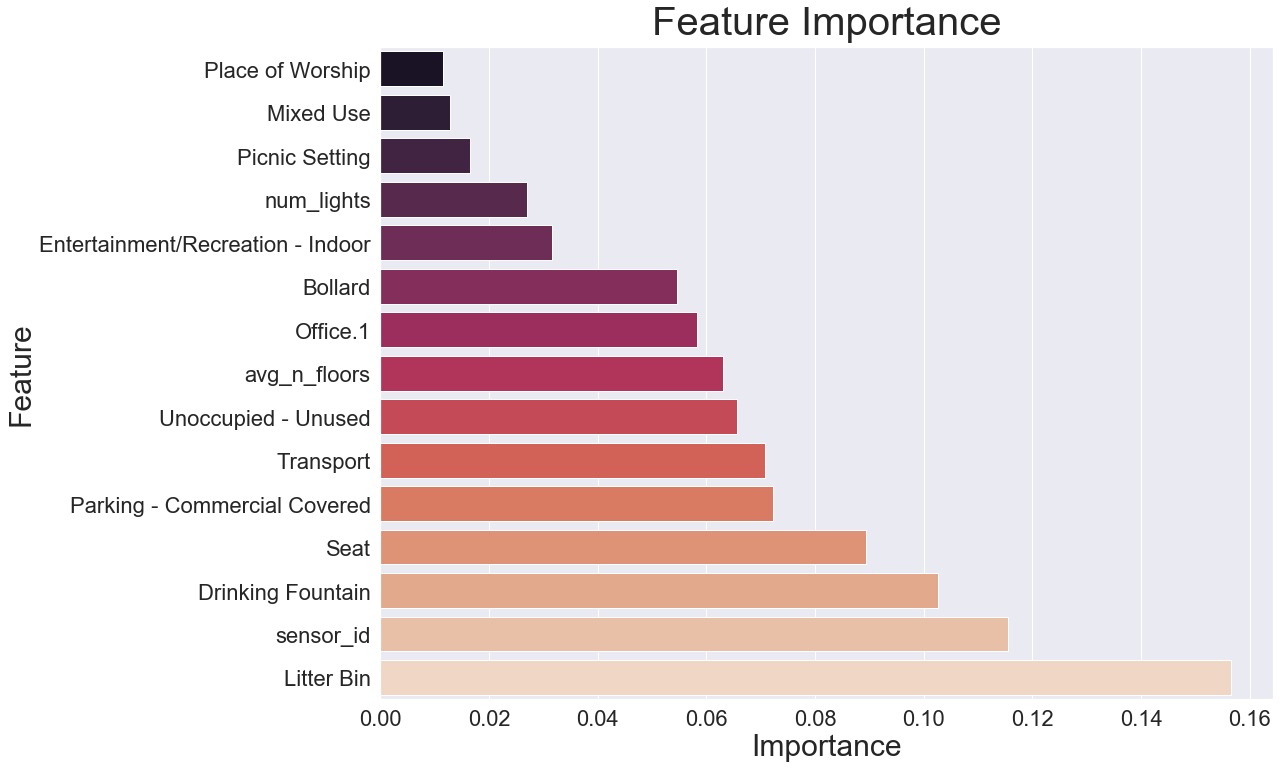

In [63]:
#sns.set_style('ticks')
sns.set(font_scale = 2)
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(16, 12)
sns.barplot(x='Feature Importance', y='Feature', data=feature_importance[-15:], orient='h', palette = 'rocket', saturation=0.7)  
ax.set_title("Feature Importance", fontsize=40, y=1.01)
ax.set_xlabel('Importance', fontsize = 30)
ax.set_ylabel('Feature', fontsize = 30)

fig.savefig('location_feature_importance.png')

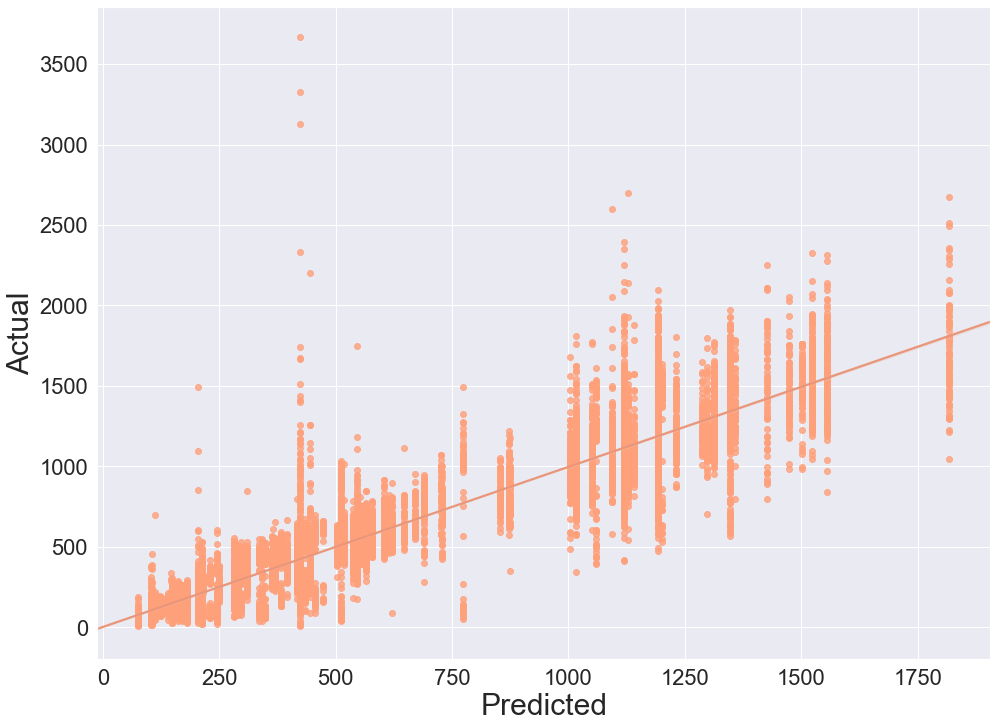

In [112]:
sns.axes_style(style='white')

sns.set(font_scale = 2)
fig, ax = plt.subplots()
fig.set_size_inches(16, 12)
ax = sns.regplot(x="predictions", y="y_test", data= predictions,  scatter_kws = {'color': 'lightsalmon'}, 
                 line_kws = {'color': 'darksalmon'})
ax.set_xlabel('Predicted', fontsize = 30)
ax.set_ylabel('Actual', fontsize = 30)
fig.savefig('location_pred_actual.png')